<a href="https://colab.research.google.com/github/kalai2315/Image_Classifier/blob/main/Image_Classification_VGG16Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learnings From Pre Built Model**

# **Problem Statement:**
The categorization of images into distinct classes is a pervasive task in computer
vision, and it has a wide array of applications, including in pet identification and
animal monitoring systems. In this assignment, we aim to develop a model
capable of accurately distinguishing between cat and dog images. Instead of
building a convolutional neural network (CNN) from scratch, we will leverage
transfer learning using the VGG16 model, a pre-trained model on the ImageNet
dataset. VGG16 is renowned for its effectiveness in image recognition tasks, but
it does not have broad categories for cats and dogs. Therefore, we will utilize the
convolutional (Conv) layers of VGG16 for feature extraction and add custom fully
connected (Cat) layers for the classification task.


Dataset Link: https://drive.google.com/drive/folders/1esmI2yCyALTOakpb6D7PVayGxnZAuTPd?usp=sharing

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!ls /content/drive/MyDrive/Dataset

cats  dogs


In [13]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = '/content/drive/MyDrive/Dataset'
output_dir = '/content/dataset_split'

# Create train, validation, and test directories
for folder in ['train', 'validation', 'test']:
    for category in ['cats', 'dogs']:
        os.makedirs(os.path.join(output_dir, folder, category), exist_ok=True)

# Move images into train, validation, and test sets
for category in ['cats', 'dogs']:
    source_dir = os.path.join(dataset_dir, category)
    images = os.listdir(source_dir)

    train, val_test = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(val_test, test_size=0.5, random_state=42)

    for fname in train:
        shutil.copy(os.path.join(source_dir, fname), os.path.join(output_dir, 'train', category, fname))
    for fname in val:
        shutil.copy(os.path.join(source_dir, fname), os.path.join(output_dir, 'validation', category, fname))
    for fname in test:
        shutil.copy(os.path.join(source_dir, fname), os.path.join(output_dir, 'test', category, fname))

print("Dataset organized successfully!")


Dataset organized successfully!


In [14]:
!ls /content/dataset_split/train/cats
!ls /content/dataset_split/train/dogs


cat.0.jpg    cat.230.jpg  cat.356.jpg  cat.491.jpg  cat.617.jpg  cat.743.jpg  cat.869.jpg
cat.100.jpg  cat.231.jpg  cat.357.jpg  cat.492.jpg  cat.618.jpg  cat.746.jpg  cat.86.jpg
cat.101.jpg  cat.232.jpg  cat.358.jpg  cat.493.jpg  cat.61.jpg	 cat.747.jpg  cat.870.jpg
cat.103.jpg  cat.233.jpg  cat.360.jpg  cat.494.jpg  cat.620.jpg  cat.749.jpg  cat.871.jpg
cat.104.jpg  cat.234.jpg  cat.364.jpg  cat.495.jpg  cat.622.jpg  cat.74.jpg   cat.872.jpg
cat.105.jpg  cat.235.jpg  cat.365.jpg  cat.496.jpg  cat.623.jpg  cat.750.jpg  cat.874.jpg
cat.106.jpg  cat.236.jpg  cat.366.jpg  cat.499.jpg  cat.624.jpg  cat.751.jpg  cat.875.jpg
cat.108.jpg  cat.237.jpg  cat.368.jpg  cat.49.jpg   cat.626.jpg  cat.752.jpg  cat.876.jpg
cat.109.jpg  cat.238.jpg  cat.36.jpg   cat.4.jpg    cat.627.jpg  cat.753.jpg  cat.878.jpg
cat.10.jpg   cat.23.jpg   cat.370.jpg  cat.500.jpg  cat.628.jpg  cat.754.jpg  cat.879.jpg
cat.111.jpg  cat.241.jpg  cat.372.jpg  cat.501.jpg  cat.629.jpg  cat.756.jpg  cat.87.jpg
cat.112.jpg  

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [2]:
# Load pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Freeze convolutional layers to retain pre-trained features
base_model.trainable = False

In [4]:
# Add custom fully connected layers for classification
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 classes: cats and dogs
])

In [5]:
# Compile the model
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Set up data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Load data
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_split/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = validation_datagen.flow_from_directory(
    '/content/dataset_split/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [19]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 469s 11s/step - accuracy: 0.7009 - loss: 0.5698 - val_accuracy: 0.8021 - val_loss: 0.4383
Epoch 2/5
 1/43 ━━━━━━━━━━━━━━━━━━━━ 7:04 10s/step - accuracy: 0.7188 - loss: 0.6044

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.7188 - loss: 0.6044 - val_accuracy: 0.9167 - val_loss: 0.3449
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 485s 11s/step - accuracy: 0.7333 - loss: 0.5235 - val_accuracy: 0.8611 - val_loss: 0.3701
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6562 - loss: 0.5625 - val_accuracy: 1.0000 - val_loss: 0.2656
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 503s 11s/step - accuracy: 0.7409 - loss: 0.4966 - val_accuracy: 0.8194 - val_loss: 0.3903


In [20]:
# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/dataset_split/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 300 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.7777 - loss: 0.4608
Test Accuracy: 79.67%


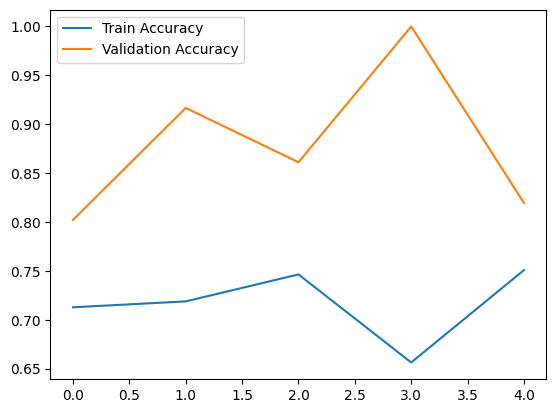

In [21]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
image_path = '/content/cat1.jpg'
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [25]:
prediction = model.predict(img_array)
class_idx = prediction.argmax()
confidence = prediction[0][class_idx]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


In [26]:
labels = {v: k for k, v in train_generator.class_indices.items()}
print(f"Predicted Class: {labels[class_idx]}, Confidence: {confidence:.2f}")


Predicted Class: cats, Confidence: 0.65


In [23]:
# Prediction on new images
def predict_image(image_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    img = image.load_img('/content/cat1.jpg', target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_idx = prediction.argmax()
    confidence = prediction[0][class_idx]



In [ ]:
labels = {v: k for k, v in train_generator.class_indices.items()}
print(f"Predicted Class: {labels[class_idx]}, Confidence: {confidence:.2f}")

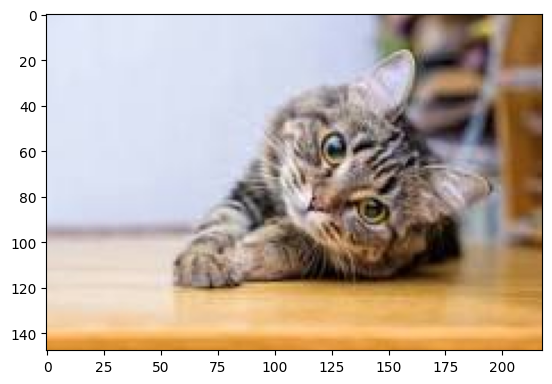

In [27]:
import matplotlib.pyplot as plt
img = image.load_img(image_path)
plt.imshow(img)
plt.show()


In [28]:
# Save the model after training
model.save('/content/drive/MyDrive/cats_dogs_model.h5')  # Save the model to Google Drive


In [29]:
from tensorflow.keras.models import load_model

# Load the trained model from the .h5 file
model = load_model('/content/drive/MyDrive/cats_dogs_model.h5')


In [30]:
# Example usage
predict_image('/content/cat1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
Predicted Class: cats, Confidence: 0.65


In [31]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [32]:
!pip install pyngrok

In [37]:
%%writefile image_classifier.py
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('/content/drive/MyDrive/cats_dogs_model.h5')

# Define class labels (you can get them from your train generator class indices)
class_labels = {0: 'Cat', 1: 'Dog'}

# Streamlit app title
st.title("Cats vs Dogs Image Classifier")

# Upload Image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

# Image Preprocessing
def preprocess_image(img):
    img = image.load_img(img, target_size=(150, 150))  # Resize image to 150x150
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Make predictions
if uploaded_file is not None:
    img = image.load_img(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Preprocess image and make prediction
    img_array = preprocess_image(uploaded_file)
    prediction = model.predict(img_array)

    class_idx = prediction.argmax()  # Get the class index (0 for Cat, 1 for Dog)
    confidence = prediction[0][class_idx]  # Get the confidence of the prediction

    st.write(f"Predicted Class: {class_labels[class_idx]}")
    st.write(f"Confidence: {confidence:.2f}")

    # Show a bar chart for prediction confidence
    fig, ax = plt.subplots()
    ax.bar(class_labels.values(), prediction[0], color=['blue', 'orange'])
    ax.set_ylabel('Confidence')
    st.pyplot(fig)


Overwriting image_classifier.py


In [34]:
# Restart Streamlit app
!streamlit run image_classifier.py &>/dev/null&

In [35]:
!ngrok config add-authtoken 2ldmsLpKzhUHwtMmhMHw18qtqLQ_7HVy6zxNizWKfyMbMaDEu

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [36]:
from pyngrok import ngrok
public_url = ngrok.connect(addr='8501')
print(public_url)

NgrokTunnel: "https://37e9-35-245-228-171.ngrok-free.app" -> "http://localhost:8501"
